In [3]:
import tensorflow as tf
import keras as keras
import matplotlib.pyplot as plt
import os

import keras.utils as img

In [4]:
images_path = "C:\\Users\\fijal\Documents\Repository\BIAI\sorted_data\sorted_data"
class_names = os.listdir(images_path)
number_of_classes = len(class_names)
data_set = img.image_dataset_from_directory(images_path, class_names=class_names)
DATASET_SIZE = (len(data_set))
train_size = int(0.7 * DATASET_SIZE)
val_size = int(0.15 * DATASET_SIZE)
test_size = int(0.15 * DATASET_SIZE)

train_dataset = data_set.take(train_size)
test_dataset = data_set.skip(train_size)
val_dataset = test_dataset.skip(test_size)
test_dataset = test_dataset.take(test_size)

Found 19802 files belonging to 2 classes.


In [5]:
model4 = keras.Sequential(
    [
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(2048, activation='relu'),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dense(number_of_classes, activation="softmax")
    ]
)
opt=tf.keras.optimizers.RMSprop(learning_rate=0.0005)
model4.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history4 = model4.fit(train_dataset, validation_data=val_dataset, epochs=30)

Epoch 1/30
433/433 [==============================] - 81s 179ms/step - loss: 14.7097 - accuracy: 0.5250 - val_loss: 0.7428 - val_accuracy: 0.5010
Epoch 2/30
433/433 [==============================] - 77s 178ms/step - loss: 0.7014 - accuracy: 0.5925 - val_loss: 0.6518 - val_accuracy: 0.6193
Epoch 3/30
433/433 [==============================] - 77s 178ms/step - loss: 0.6474 - accuracy: 0.6392 - val_loss: 0.6767 - val_accuracy: 0.5703
Epoch 4/30
433/433 [==============================] - 77s 177ms/step - loss: 0.6051 - accuracy: 0.6798 - val_loss: 0.6276 - val_accuracy: 0.6779
Epoch 5/30
433/433 [==============================] - 77s 177ms/step - loss: 0.5751 - accuracy: 0.7023 - val_loss: 0.5865 - val_accuracy: 0.6942
Epoch 6/30
433/433 [==============================] - 76s 176ms/step - loss: 0.5364 - accuracy: 0.7305 - val_loss: 0.5219 - val_accuracy: 0.7375
Epoch 7/30
433/433 [==============================] - 76s 176ms/step - loss: 0.5059 - accuracy: 0.7543 - val_loss: 0.6234 - val_a

In [6]:
results4 = model4.evaluate(test_dataset)

92/92 [==============================] - 10s 40ms/step - loss: 0.4434 - accuracy: 0.8478


test loss, test acc: [0.4434066712856293, 0.8478260636329651]


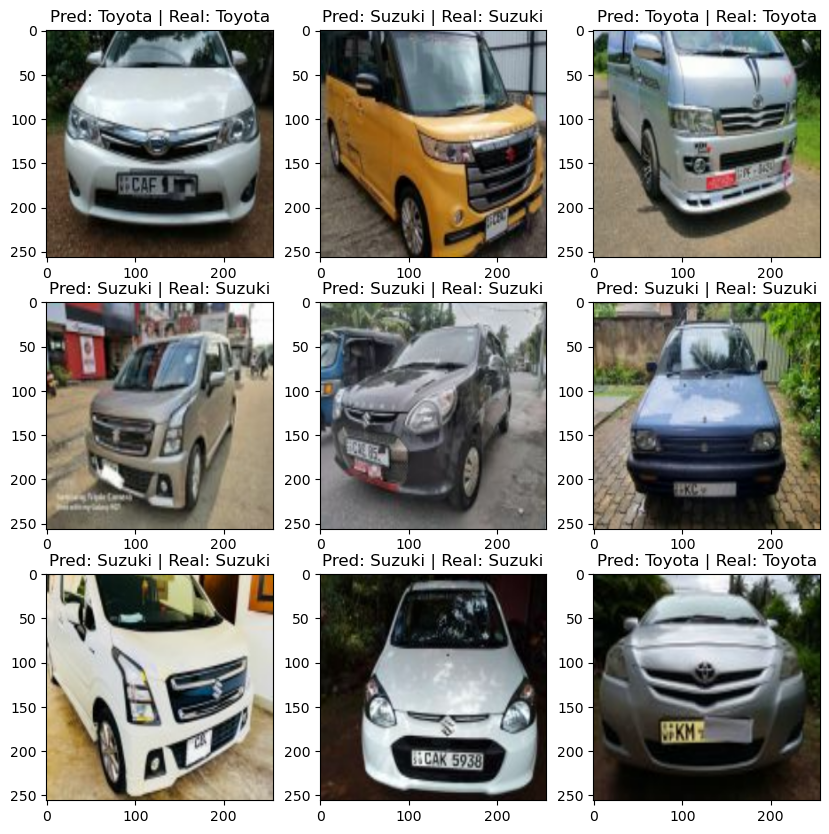

In [7]:
print("test loss, test acc:", results4)
plt.figure(figsize=(10, 10))

for images, labels in val_dataset.take(1):
    classifications = model4(images)
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        index = (classifications[i].numpy()).tolist().index(max(classifications[i].numpy()))
        plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])


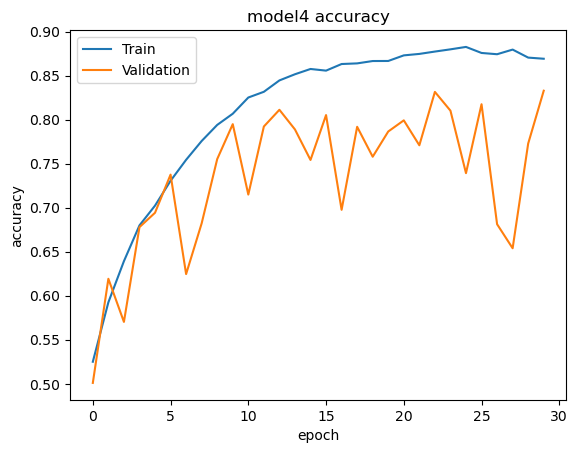

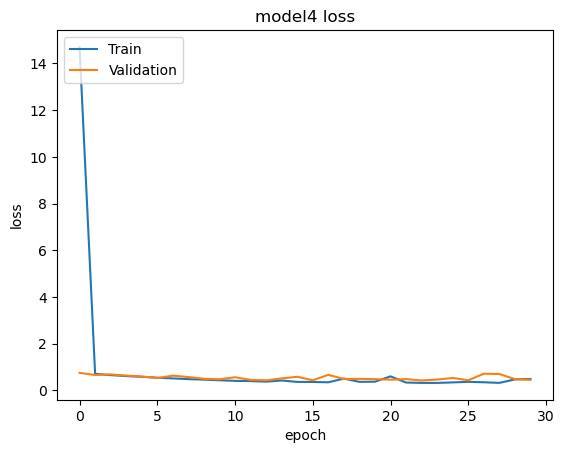

In [8]:
# summarize history for accuracy
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model4 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model4 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [9]:
model4.save('C:\\Users\\fijal\Documents\Repository\BIAI\Models_5_brands\Model4')

INFO:tensorflow:Assets written to: C:\Users\fijal\Documents\Repository\BIAI\Models_2_brands\Model4\assets


INFO:tensorflow:Assets written to: C:\Users\fijal\Documents\Repository\BIAI\Models_2_brands\Model4\assets
